**Author: Anupriya Tripathi (a3tripat@ucsd.edu)**

In [11]:
%matplotlib inline
import calour as ca
import seaborn as sns
import numpy as np
import pandas as pd
from calour.training import plot_roc
import matplotlib.pyplot as plt
np.random.seed(2018)
ca.set_log_level(40)

In [12]:
# read the feature table with microbial counts per sample and metadata table
ft = pd.read_table('reference-hit9k.txt', sep='\t', dtype=str, skiprows=1, index_col=0)
md = pd.read_table('all_qiime_mapping_complete_corr_CC_28_09.txt', sep='\t', dtype=str, index_col=0)

In [13]:
ft.head(2)

,11635.CIR42.002,11635.TW.BE.001,11635.FS.CIR2.001,11635.CIR61.001,11635.TW.BV.001,11635.TW.CL.001,11635.TW.AM.001,11635.TW.BG.002,11635.CIR63.002,11635.TW.BT.002,...,11635.CIR21.001,11635.TW.BL.001,11635.TW.DF.002,11635.TW.DU.002,11635.TW.CE.001,11635.TW.AU.002,11635.TW.CT.002,11635.CIR19.001,11635.TW.BN.002,11635.TW.AW.001
#OTU ID,,,,,,,,,,,,,,,,,,,,,
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGG,7886.0,66.0,6.0,8970.0,6.0,0.0,0.0,34.0,25.0,0.0,...,23.0,0.0,2.0,1521.0,8109.0,2.0,169.0,1379.0,4.0,20.0
TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCGCGCAGGCGGCTTCCCAAGTCCCTCTTAAAAGTGCGGGGCTTAACCCCGTGATGGGAAGGAAACTGGGAAGCTGGAGTATCGGAGAGGAAAGTGGAATTCCTAGT,484.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,34.0,0.0,0.0,0.0,6.0,233.0,134.0


In [14]:
md.head(2)

,Relatives,BarcodeSequence,LinkerPrimerSequence,center_name,center_project_name,experiment_design_description,extraction_robot,extractionkit_lot,instrument_model,library_construction_protocol,...,wbc,weight,weight_units,zygocity,zygoticity,Description,non_NAFLD_proband,NAFLD_no_AF_proband,adv_fibrosis,groups
#SampleID,,,,,,,,,,,,,,,,,,,,,
11635.BLANK1.1A,not applicable,AGCCTTCGTCGC,GTGTGYCAGCMGCCGCGGTAA,UCSDMI,Loomba twins,fecal samples from NAFLD twins study and cirrh...,Carmen_HOWE_KF1,157022405,Illumina MiSeq,"Illumina EMP protocol 515fbc, 806r amplificati...",...,not applicable,Not Applicable,not applicable,not applicable,Not Applicable,BLANK1.1A,NaN,NaN,not applicable,NaN
11635.BLANK1.1B,not applicable,CGTATAAATGCG,GTGTGYCAGCMGCCGCGGTAA,UCSDMI,Loomba twins,fecal samples from NAFLD twins study and cirrh...,Carmen_HOWE_KF1,157022405,Illumina MiSeq,"Illumina EMP protocol 515fbc, 806r amplificati...",...,not applicable,Not Applicable,not applicable,not applicable,Not Applicable,BLANK1.1B,NaN,NaN,not applicable,NaN


#### load study

In [15]:
exp = ca.read_amplicon('reference-hit9k.biom', 'all_qiime_mapping_complete_corr_CC_28_09.txt', 
                       feature_metadata_file= 'taxonomy.txt', normalize=None, min_reads=None)
print(exp)

AmpliconExperiment ("reference-hit9k.biom") with 192 samples, 5709 features


In [16]:
print('There are %d samples & %d microbial features in this study.' %(exp.shape[0], exp.shape[1]))

There are 192 samples & 5709 microbial features in this study.


The metadata field 'groups' is used to categorize the probands. 
- G1P is non-NAFLD controls; G1R first degree relatives
- G2P is NAFLD no advanced Fibrosis; G2R first degree relatives
- G3P is NAFLD-cirrhosis; G3R first degree relatives

## 1. Random Forest model 1 with all features

### 1A. train RF on non-NAFLD controls (G1P) vs. NAFLD cirrhosis (G3P) probands

In [17]:
# filter samples to keep these two groups
expf = exp.filter_by_metadata('groups', ['G1P','G3P'], axis=0, negate=False).filter_by_metadata(
    'adv_fibrosis', ['0', '1'], axis=0, negate=False)
expf.sample_metadata.groups.value_counts()

G1P    47
G3P    25
Name: groups, dtype: int64

In [18]:
expf.sample_metadata.adv_fibrosis.values

array(['1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1',
       '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '1', '0', '1', '0'], dtype=object)

In [19]:
# prepare training data
X_train = expf.data

# label encoder
y_train = []
for idx in expf.sample_metadata.index:
    if expf.sample_metadata.loc[idx, 'adv_fibrosis'] == '0':
        y_train.append(0)
    else:
        y_train.append(1)

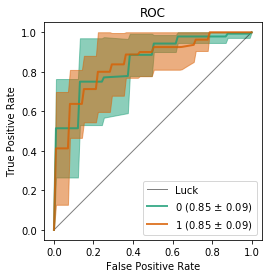

In [20]:
#default model with Stratified shuffle split
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

it = expf.classify('adv_fibrosis',RandomForestClassifier(500, n_jobs=4, random_state=9), 
                            cv=StratifiedShuffleSplit(y_train,10, test_size=0.3, random_state=0))

res = next(it)
fig = plot_roc(res)

In [21]:
clf1 = RandomForestClassifier(500, oob_score=True, random_state=0)
clf1.fit(X_train, y_train)
clf1.oob_score_

0.72222222222222221

### 1B. test on NAFLD-cirrhosis first degree relatives (G3R)

In [22]:
expf2 = exp.filter_by_metadata('groups', ['G3R'], axis=0, negate=False).filter_by_metadata('adv_fibrosis', ['0', '1'],
                                                                                          axis=0, negate=False)
expf2.sample_metadata.adv_fibrosis.value_counts()

0    25
1     7
Name: adv_fibrosis, dtype: int64

In [23]:
expf2.sample_metadata.adv_fibrosis.values

array(['0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0'], dtype=object)

In [24]:
# prepare testing data
X_test = expf2.data
y_test = []

for idx in expf2.sample_metadata.index:
    if expf2.sample_metadata.loc[idx, 'adv_fibrosis'] == '0':
        y_test.append(0)
    if expf2.sample_metadata.loc[idx, 'adv_fibrosis'] == '1':
        y_test.append(1)

In [25]:
# testing
res = pd.DataFrame(clf1.predict_proba(X_test))
res.columns = clf1.classes_
res['Y_TRUE'] = y_test
res['CV'] = 0

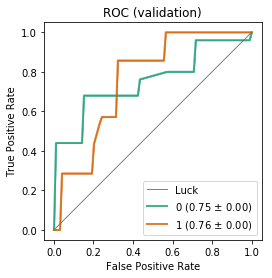

In [26]:
fig = plot_roc(res, title='ROC (validation)').get_figure()

**Next, we perform feature selection by making a predictive model using top predictors of the previous model. For this, we use features with a variable importance score > 0.005** 

In [27]:
# extracting important feature list from model 1
seqs = expf.feature_metadata.copy()
fimp1 = clf1.feature_importances_
seqs['imp.score'] = fimp1
seqs.sort_values(by='imp.score', ascending=False, inplace=True)

In [28]:
# saving features with > 5% imp score
top_pred = seqs[seqs['imp.score'] > 0.005]
top_predseqs = list(top_pred.index)

In [29]:
print('The number of top predictors are %d' %len(top_predseqs))

The number of top predictors are 27


## 2. Random Forest model 2 using the top predictors from model 1 (importance score > 0.005)

### 2A. train Random forest on non-NAFLD controls (G1P) vs. NAFLD cirrhosis (G3P) probands

In [30]:
# filter exp to keep G1P and G2P only
expf = exp.filter_by_metadata('groups', ['G1P', 'G3P'], axis=0, negate=False).filter_by_metadata(
    'adv_fibrosis', ['0', '1'], axis=0, negate=False)

# filter to keep only top predictors from previous model
expf = expf.filter_ids(top_predseqs, axis='f')
expf.shape

(72, 27)

In [31]:
expf.sample_metadata.adv_fibrosis.values

array(['1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1',
       '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '1', '0', '1', '0'], dtype=object)

In [32]:
# prepare training data
X_train = expf.data

# label encoder
y_train = []
for idx in expf.sample_metadata.index:
    if expf.sample_metadata.loc[idx, 'adv_fibrosis'] == '0':
        y_train.append(0)
    else:
        y_train.append(1)

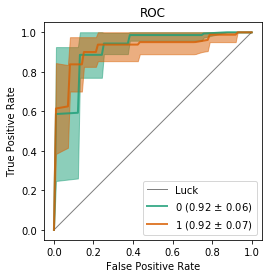

In [33]:
#default model with Stratified shuffle split

from sklearn.cross_validation import StratifiedShuffleSplit

it = expf.classify('adv_fibrosis',
                            RandomForestClassifier(500, n_jobs=4, random_state=9), 
                            cv=StratifiedShuffleSplit(y_train,10, test_size=0.3, random_state=0))

res = next(it)
fig = plot_roc(res).get_figure()

In [34]:
clf2 = RandomForestClassifier(500, oob_score=True)
clf2.fit(X_train, y_train)
clf2.oob_score_

0.875

In [35]:
fig2 = fig.tight_layout()
fig.savefig('figures/auc_G1PvsG3P_top_predseqs.pdf', bbox_to_inches='tight')

### 2B. test on NAFLD-cirrhosis first degree relatives (G3R)

In [36]:
expf2 = exp.filter_by_metadata('groups', ['G3R'], axis=0, negate=False).filter_by_metadata('adv_fibrosis', ['0', '1'],
                                                                                          axis=0, negate=False)

# filter to keep only top 100 predictors from previous model
expf2 = expf2.filter_ids(top_predseqs, axis='f')
expf2.shape

(32, 27)

In [37]:
expf2.sample_metadata.adv_fibrosis.values

array(['0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0'], dtype=object)

In [38]:
# prepare testing data
X_test = expf2.data
y_test = []

for idx in expf2.sample_metadata.index:
    if expf2.sample_metadata.loc[idx, 'adv_fibrosis'] == '0':
        y_test.append(0)
    if expf2.sample_metadata.loc[idx, 'adv_fibrosis'] == '1':
        y_test.append(1)

In [39]:
# testing
res = pd.DataFrame(clf2.predict_proba(X_test))
res.columns = clf2.classes_
res['Y_TRUE'] = y_test
res['CV'] = 0

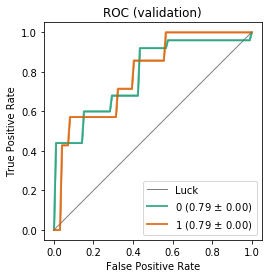

In [40]:
fig = plot_roc(res, title='ROC (validation)').get_figure()

In [41]:
# testing prediction
y_pred = clf2.predict(X_test)
test_samps = list(expf2.sample_metadata.index)

for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        print(y_test[i], y_pred[i], test_samps[i])

1 0 11635.CIR55.002
1 0 11635.CIR7.002
1 0 11635.CIR51.004
0 1 11635.CIR60.002
1 0 11635.CIR26.002
0 1 11635.CIR5.002


In [42]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print('True negative:', tn)
print('True positive:', tp)
print('False negative:', fn)
print('False positive:', fp)

True negative: 23
True positive: 3
False negative: 4
False positive: 2


**We are able to increase the accuracy of predictions by feature selection alone. Next, we can include age, sex and BMI in the model to boost it further. These factors have previously been shown to be important for AF prediction  (Loomba R. et al.,2017)**

## 3. Random forest model 3 with top predictors + age, sex , bmi

### 3A. add age, sex, bmi

In [43]:
# create file with all predictive features
exp.save_biom('tables/predbact.txt', fmt='txt')

# read file as pandas dataframe
predall = pd.read_table('tables/predbact.txt', skiprows=1, index_col=0)
predall = predall.T

# extract age, sex & BMI for each sample from metadata table
agecol = [exp.sample_metadata.loc[sample,'age'] for sample in predall.index]
sexcol = [1 if exp.sample_metadata.loc[sample,'sex'] == 'female' else 0 for sample in predall.index]
bmicol = [exp.sample_metadata.loc[sample,'bmi'] for sample in predall.index]

# add to file with predictors
predall['age'] = agecol
predall['sex'] = sexcol
predall['bmi'] = bmicol

In [46]:
predall.reset_index().rename(columns={'index':'#SampleID'}).to_csv('tables/source_data_fig4_predictors.csv', sep=',',
                                                                  index=False)

In [48]:
## not all BMI values are numeric 
#-> remove samples with non-numeric values as model won't take them
todrop = []
for sample in predall.index:
    try:
        float(predall.loc[sample, 'bmi'])
    except:
        todrop.append(sample)
        
predall2 = predall.drop(todrop, axis=0)

In [52]:
# save file with all microbial predictors + age, sex and BMI
predall2.T.reset_index().rename(columns={'#OTU ID':'predictors'}).to_csv('tables/source_data_fig4_predictors.txt', 
                                                                      sep='\t', index=False)

In [53]:
# read file with all microbial predictors + age, sex and BMI
exp = ca.read_amplicon('tables/source_data_fig4_predictors.txt', 'all_qiime_mapping_complete_corr_CC_28_09.txt', 
                       feature_metadata_file= 'taxonomy.txt', normalize=None, min_reads=None)

# filter exp to keep G1P and G3P only
expf = exp.filter_by_metadata('groups', ['G1P', 'G3P'], axis=0, negate=False).filter_by_metadata(
    'adv_fibrosis', ['0', '1'], axis=0, negate=False)

# filter exp to keep top bacteria + age, sex & BMI only
expf = expf.filter_ids(list(top_predseqs)+['age', 'sex', 'bmi'], axis='f')

### 3B. train Random forest on non-NAFLD controls (G1P) vs. NAFLD cirrhosis (G3P) probands

In [54]:
expf.sample_metadata.adv_fibrosis.value_counts()

0    47
1    24
Name: adv_fibrosis, dtype: int64

In [55]:
expf.shape

(71, 30)

In [56]:
# prepare training data
X_train = expf.data

# label encoder
y_train = []
for idx in expf.sample_metadata.index:
    if expf.sample_metadata.loc[idx, 'adv_fibrosis'] == '0':
        y_train.append(0)
    else:
        y_train.append(1)

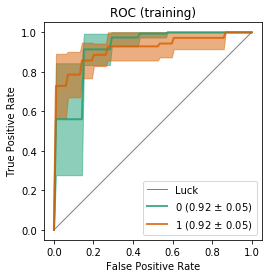

In [57]:
#default model with Stratified shuffle split

from sklearn.cross_validation import StratifiedShuffleSplit

it = expf.classify('adv_fibrosis',
                            RandomForestClassifier(500, n_jobs=4, random_state=9), 
                            cv=StratifiedShuffleSplit(y_train,10, test_size=0.3, random_state=0))

res = next(it)
fig = plot_roc(res, title='ROC (training)').get_figure()

In [58]:
fig.tight_layout()

In [59]:
fig.savefig('figures/auc_G1PvsG3P_top_predseqs_ageSexBMI.pdf', bbox_to_inches='tight')

### 3C. test on NAFLD cirrhosis first degree relatives

In [60]:
expf2 = exp.filter_by_metadata('groups', ['G3R'], axis=0, negate=False).filter_by_metadata('adv_fibrosis', ['0', '1'],
                                                                                          axis=0, negate=False)
# filter to keep only top predictors + age, sex, bmi from previous model
expf2 = expf2.filter_ids(list(top_predseqs)+['age', 'sex', 'bmi'], axis='f')
expf2.shape

(32, 30)

In [61]:
expf2.sample_metadata.adv_fibrosis.values

array(['0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0'], dtype=object)

In [62]:
# prepare testing data
X_test = expf2.data
y_test = []

for idx in expf2.sample_metadata.index:
    if expf2.sample_metadata.loc[idx, 'adv_fibrosis'] == '0':
        y_test.append(0)
    if expf2.sample_metadata.loc[idx, 'adv_fibrosis'] == '1':
        y_test.append(1)

In [63]:
clf3 = RandomForestClassifier(500, oob_score=True)
clf3.fit(X_train, y_train)
clf3.oob_score_

0.88732394366197187

In [64]:
# testing prediction
y_pred = clf3.predict(X_test)
test_samps = list(expf2.sample_metadata.index)

for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        print(y_test[i], y_pred[i], test_samps[i])

1 0 11635.CIR7.002
1 0 11635.CIR51.004
0 1 11635.CIR54.002
0 1 11635.CIR60.002
0 1 11635.CIR5.002


In [65]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print('True negative:', tn)
print('True positive:', tp)
print('False negative:', fn)
print('False positive:', fp)

True negative: 22
True positive: 5
False negative: 2
False positive: 3


In [66]:
# save the important features and importance scores
seqs = expf.feature_metadata.copy()
fimp1 = clf3.feature_importances_
seqs['imp.score'] = fimp1
seqs.sort_values(by='imp.score', ascending=False, inplace=True)

seqs.drop(['Taxon_tw','Confidence_tw','Taxon_cir','Confidence_cir'], axis=1).reset_index().to_csv(
    'tables/imp.features.G1PvG3P_ageSexBMI.csv', sep=',', index=False)

In [67]:
res = pd.DataFrame(clf3.predict_proba(X_test))
res.columns = clf3.classes_
res['Y_TRUE'] = y_test
res['CV'] = 0

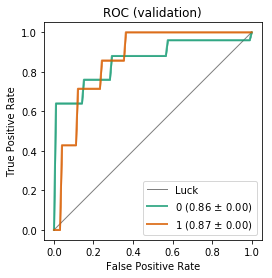

In [68]:
fig = plot_roc(res, title='ROC (validation)').get_figure()

In [69]:
fig.savefig('figures/auc_validation_G3R_top_predseqs_ageSexBMI.pdf', bbox_to_inches='tight')

### 3D. test on NAFLD cirrhosis first degree relatives and NAFLD no AF probands

In [70]:
expf2 = exp.filter_by_metadata('groups', ['G2P','G3R'], axis=0, negate=False).filter_by_metadata('adv_fibrosis', ['0', '1'],
                                                                                          axis=0, negate=False)
# filter to keep only top predictors + age, sex, bmi from previous model
expf2 = expf2.filter_ids(list(top_predseqs)+['age', 'sex', 'bmi'], axis='f')
expf2.shape

(49, 30)

In [71]:
expf2.sample_metadata.adv_fibrosis.value_counts()

0    42
1     7
Name: adv_fibrosis, dtype: int64

In [72]:
# prepare testing data
X_test = expf2.data
y_test = []

for idx in expf2.sample_metadata.index:
    if expf2.sample_metadata.loc[idx, 'adv_fibrosis'] == '0':
        y_test.append(0)
    if expf2.sample_metadata.loc[idx, 'adv_fibrosis'] == '1':
        y_test.append(1)

In [73]:
clf3 = RandomForestClassifier(500, oob_score=True)
clf3.fit(X_train, y_train)
clf3.oob_score_

0.88732394366197187

In [74]:
# testing prediction
y_pred = clf3.predict(X_test)
test_samps = list(expf2.sample_metadata.index)

for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        print(y_test[i], y_pred[i], test_samps[i])

1 0 11635.CIR55.002
1 0 11635.CIR7.002
1 0 11635.CIR51.004
0 1 11635.CIR54.002
0 1 11635.TW.CF.001
0 1 11635.CIR60.002
0 1 11635.TW.DI.002
0 1 11635.CIR5.002


In [75]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print('True negative:', tn)
print('True positive:', tp)
print('False negative:', fn)
print('False positive:', fp)

True negative: 37
True positive: 4
False negative: 3
False positive: 5


In [76]:
# save the important features and importance scores
seqs = expf.feature_metadata.copy()
fimp1 = clf3.feature_importances_
seqs['imp.score'] = fimp1
seqs.sort_values(by='imp.score', ascending=False, inplace=True)

In [77]:
res = pd.DataFrame(clf3.predict_proba(X_test))
res.columns = clf3.classes_
res['Y_TRUE'] = y_test
res['CV'] = 0

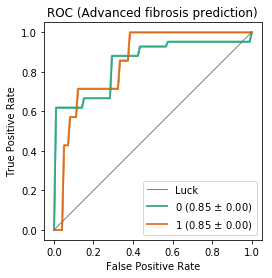

In [78]:
fig = plot_roc(res, title='ROC (Advanced fibrosis prediction)').get_figure()

In [79]:
fig.savefig('figures/auc_validation_G2P_G3R_top_predseqs_ageSexBMI.png', bbox_to_inches='tight')

## 4. Random forest model 4 -- is our model learning Type 2 diabetes signature?

### 4A. add type 2 diabetes

In [423]:
# read file with all microbial predictors + age, sex and BMI
exp = ca.read_amplicon('tables/predall.txt', 'all_qiime_mapping_complete_corr_CC_28_09.txt', 
                       feature_metadata_file= 'taxonomy.txt', normalize=None, min_reads=None)

# filter exp to keep G1P and G3P only
expf = exp.filter_by_metadata('groups', ['G1P', 'G3P'], axis=0, negate=False).filter_by_metadata(
    'adv_fibrosis', ['0', '1'], axis=0, negate=False).filter_by_metadata('diabetes_t2', ['0', '1'], 
                                                                         axis=0, negate=False)

# filter exp to keep top bacteria + age, sex & BMI only
expf = expf.filter_ids(list(top_predseqs)+['age', 'sex', 'bmi'], axis='f')

### 4B. train Random forest on non-NAFLD controls (G1P) vs. NAFLD cirrhosis (G3P) probands

In [427]:
expf.sample_metadata.adv_fibrosis.value_counts()

0    47
1    24
Name: adv_fibrosis, dtype: int64

In [428]:
expf.sample_metadata.diabetes_t2.value_counts()

0    50
1    21
Name: diabetes_t2, dtype: int64

In [429]:
expf.shape

(71, 30)

In [430]:
# prepare training data
X_train = expf.data

# label encoder
y_train = []
for idx in expf.sample_metadata.index:
    if expf.sample_metadata.loc[idx, 'diabetes_t2'] == '0':
        y_train.append(0)
    else:
        y_train.append(1)

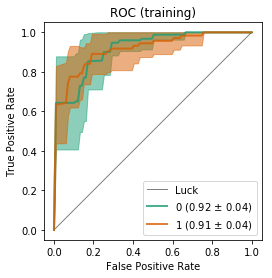

In [431]:
#default model with Stratified shuffle split

from sklearn.cross_validation import StratifiedShuffleSplit

it = expf.classify('adv_fibrosis',
                            RandomForestClassifier(500, n_jobs=4, random_state=9), 
                            cv=StratifiedShuffleSplit(y_train,10, test_size=0.3, random_state=0))

res = next(it)
fig = plot_roc(res, title='ROC (training)').get_figure()

In [432]:
fig.tight_layout()

In [433]:
fig.savefig('figures/auc_G1PvsG3P_top_predseqs_ageSexBMI_type2D.pdf', bbox_to_inches='tight')

### 4C. test on NAFLD cirrhosis first degree relatives

In [434]:
expf2 = exp.filter_by_metadata('groups', ['G2P','G1R', 'G2R','G3R'], axis=0, negate=False).filter_by_metadata(
    'adv_fibrosis', ['0', '1'], axis=0, negate=False).filter_by_metadata('diabetes_t2', ['0', '1'], 
                                                                         axis=0, negate=False)
# filter to keep only top predictors + age, sex, bmi from previous model
expf2 = expf2.filter_ids(list(top_predseqs)+['age', 'sex', 'bmi'], axis='f')
expf2.shape

(97, 30)

In [435]:
expf2.sample_metadata.adv_fibrosis.value_counts()

0    88
1     9
Name: adv_fibrosis, dtype: int64

In [436]:
expf2.sample_metadata.diabetes_t2.value_counts()

0    84
1    13
Name: diabetes_t2, dtype: int64

In [437]:
# prepare testing data
X_test = expf2.data
y_test = []

for idx in expf2.sample_metadata.index:
    if expf2.sample_metadata.loc[idx, 'diabetes_t2'] == '0':
        y_test.append(0)
    if expf2.sample_metadata.loc[idx, 'diabetes_t2'] == '1':
        y_test.append(1)

In [438]:
clf4 = RandomForestClassifier(500, oob_score=True)
clf4.fit(X_train, y_train)
clf4.oob_score_

0.78873239436619713

In [439]:
# testing prediction
y_pred = clf4.predict(X_test)
test_samps = list(expf2.sample_metadata.index)

for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        print(y_test[i], y_pred[i], test_samps[i])

1 0 11635.TW.DU.001
1 0 11635.CIR55.002
1 0 11635.CIR16.002
1 0 11635.TW.BO.001
1 0 11635.CIR55.003
1 0 11635.TW.BO.002
0 1 11635.TW.BU.001
0 1 11635.TW.DK.001
0 1 11635.TW.DI.002
1 0 11635.CIR52.003
1 0 11635.TW.CC.002
0 1 11635.CIR26.002
1 0 11635.TW.DA.001
0 1 11635.CIR5.002
1 0 11635.TW.BT.001


In [440]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print('True negative:', tn)
print('True positive:', tp)
print('False negative:', fn)
print('False positive:', fp)

True negative: 79
True positive: 3
False negative: 10
False positive: 5


In [441]:
# save the important features and importance scores
seqs = expf.feature_metadata.copy()
fimp1 = clf4.feature_importances_
seqs['imp.score'] = fimp1
seqs.sort_values(by='imp.score', ascending=False, inplace=True)

seqs.drop(['Taxon_tw','Confidence_tw','Taxon_cir','Confidence_cir'], axis=1).reset_index().to_csv(
    'tables/imp.features.G1PvG3P_ageSexBMI_type2D.csv', sep=',', index=False)

In [442]:
res = pd.DataFrame(clf4.predict_proba(X_test))
res.columns = clf4.classes_
res['Y_TRUE'] = y_test
res['CV'] = 0

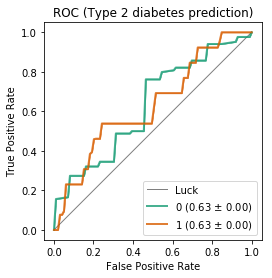

In [443]:
fig = plot_roc(res, title='ROC (Type 2 diabetes prediction)').get_figure()

In [444]:
fig.savefig('figures/auc_validation_G2P_GxR_top_predseqs_ageSexBMI_type2D.pdf', 
            bbox_to_inches='tight')

### plot important features by disease groups

In [80]:
def diff_imp_intersect(res, impf):
    
    import pandas as pd
    diff = res.copy()
    # keep important features
    diff.drop([seq for seq in diff.index if seq not in list(impf.index)], inplace=True)
    diff['imp.score'] = [impf.loc[seq, 'imp.score'] for seq in diff.index]

    return diff

In [81]:
def diff_ab(expf, colname, v1, v2):
    
    '''function to compare means & perform hypothesis testing for each feature in the two groups'''
    
    import statsmodels
    
    dexpall = expf.diff_abundance(field=colname, val1=v1, val2=v2, 
                                  method= 'meandiff', numperm=10000, alpha=1.1, 
                                  fdr_method='dsfdr', random_seed=0)
    dexp = expf.diff_abundance(field=colname, val1=v1, val2=v2, 
                                  method= 'meandiff', numperm=10000, alpha=0.1, 
                                  fdr_method='dsfdr', random_seed=0)

    expagg = expf.aggregate_by_metadata(colname, agg='mean', axis='s', inplace=False)
    md = expagg.sample_metadata
    agg = expagg.to_pandas().T

    arbsamp = list(agg.columns)
    agg = agg.rename(columns={arbsamp[1]: 'mean:' + str(md.loc[arbsamp[1], colname]), 
                              arbsamp[0]: 'mean:' + str(md.loc[arbsamp[0], colname])})

    aggpval = pd.concat([agg, dexpall.feature_metadata], axis=1)
    pvals = list(aggpval['_calour_diff_abundance_pval'])
    pvals = [1 if pd.isna(val) else val for val in pvals]
    aggpval['pval_fdrcorrected'] = statsmodels.stats.multitest.fdrcorrection(pvals, alpha=0.1, 
                                                                             method='indep', is_sorted=False)[1]
    aggpval['significant']=np.nan
    for feature in dexp.feature_metadata.index:
        aggpval.loc[feature, 'significant'] = 'TRUE'
        
    return aggpval

In [82]:
def plot_diff(res, impf, exp):
    
    '''function to generate dataframe with relative abundances of important features for plotting'''
    
    import pandas as pd
    import skbio.stats.composition as ssc
    
    diff = diff_imp_intersect(res, impf)
    diff = diff.sort_values(by='imp.score', ascending=False)
    
    # add pseudocounts
    ftable = exp.to_pandas()
    psudo_ftable = ssc.multiplicative_replacement(ftable)
    psudo_ftable = pd.DataFrame(data=psudo_ftable, 
                         index=exp.sample_metadata.index, 
                         columns=exp.feature_metadata.index)
    
    metadata = exp.sample_metadata

    pdf = pd.DataFrame(index=list(metadata.index)*len(diff.index))
    
    pdf['groups'] = list(metadata.groups)*len(diff.index)
    pdf['diabetes_t2'] = list(metadata.diabetes_t2)*len(diff.index)
    
    ab = []
    for idx in diff.index:
        tmp = list(psudo_ftable[idx])
        ab+=tmp
    pdf['abundance']=ab
    
    ff=[]
    gg=[]
    count=0
    for idx in diff.index:
        taxa = str(count) + diff.loc[idx, 'taxonomy']
        tmptax = list([taxa]*len(metadata.index))
        grp = diff.loc[idx, '_calour_diff_abundance_group']
        tmpgrp= list([grp]*len(metadata.index))
        ff += tmptax
        gg += tmpgrp
        count+=1
    pdf['feature'] = ff
    pdf['enriched'] = gg
    
    groups = pdf['enriched'].unique()
    
    pdf1 = pdf[pdf.enriched == groups[0]]
    pdf1['log10(abundance)'] = np.log10(pdf1['abundance'])
    
    pdf2 = pdf[pdf.enriched == groups[1]]
    pdf2['log10(abundance)'] = np.log10(pdf2['abundance'])
      
    return pdf1, pdf2

In [83]:
# load all samples and features
exp = ca.read_amplicon('reference-hit9k-wtax.biom', 'all_qiime_mapping_complete_corr_CC_28_09.txt', 
                       normalize=1, min_reads=None)
print(exp)

AmpliconExperiment ("reference-hit9k-wtax.biom") with 192 samples, 5709 features


In [84]:
# filter to keep G1P and G2P only
expf = exp.filter_by_metadata('groups', ['G1P', 'G2P'], axis=0, negate=False)

# differential abundance test between G1P and G2P
res1 = diff_ab(expf, 'groups', 'G1P', 'G2P')
# save means, p-values, effect size etc. for each microbial feature in the study
res1.to_csv('tables/diff_16S_G1PvG2P.csv', sep=',', index=False)

# save intersection with important features for G1P vs. G3P classification
diff = diff_imp_intersect(res1, seqs)
diff.to_csv('tables/diff_imp_16S_G1PvG2P.csv', sep=',', index=False)

/Users/priya/miniconda3/envs/calour/lib/python3.5/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [85]:
# filter to keep G2P and G3P only
expf = exp.filter_by_metadata('groups', ['G2P', 'G3P'], axis=0, negate=False)

# differential abundance test between G2P and G3P
res2 = diff_ab(expf, 'groups', 'G2P', 'G3P')
# save means, p-values, effect size etc. for each microbial feature in the study
res2.to_csv('tables/diff_16S_G2PvG3P.csv', sep=',', index=False)

# save intersection with important features for G1P vs. G3P classification
diff = diff_imp_intersect(res2, seqs)
diff.to_csv('tables/diff_imp_16S_G2PvG3P.csv', sep=',', index=False)

/Users/priya/miniconda3/envs/calour/lib/python3.5/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [86]:
# filter to keep G1P and G3P only
expf = exp.filter_by_metadata('groups', ['G1P','G3P'], axis=0, negate=False)

# differential abundance test between NAFLD controls and NAFLD-cirrhosis
res3 = diff_ab(expf, 'groups', 'G1P', 'G3P')
# save means, p-values, effect size etc. for each microbial feature in the study
res3.to_csv('tables/diff_16S_G1PvG3P.csv', sep=',', index=False)

# save intersection with important features for G1P vs. G3P classification
diff = diff_imp_intersect(res3, seqs)
diff.to_csv('tables/diff_imp_16S_G1PvG3P.csv', sep=',', index=False)

/Users/priya/miniconda3/envs/calour/lib/python3.5/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [87]:
# to plot important features for G1P vs. G3P classification
expf = exp.filter_by_metadata('groups', ['G1P','G2P', 'G3P'], axis=0, negate=False)
# differential abundance test between NAFLD controls and NAFLD-cirrhosis
res4 = diff_ab(expf, 'groups', 'G1P', 'G3P')
toplot1, toplot2 = plot_diff(res4, seqs, expf)

/Users/priya/miniconda3/envs/calour/lib/python3.5/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/priya/miniconda3/envs/calour/lib/python3.5/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/priya/miniconda3/envs/calour/lib/python3.5/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

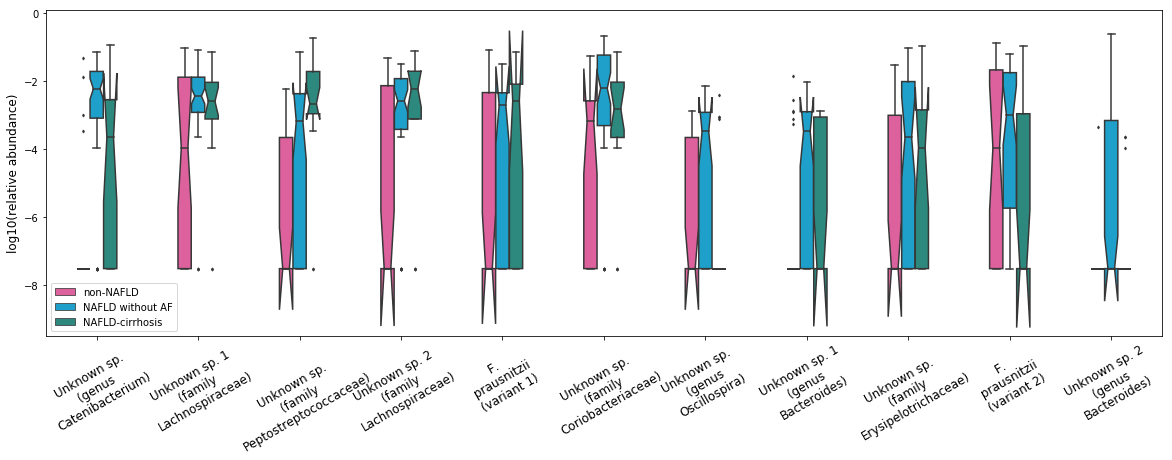

In [91]:
fig, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='feature', y='log10(abundance)',hue='groups', 
            palette={'G1P':'#01AEE8','G2P':'#1E988A','G3P':'#F04D9C'}, 
            data=toplot1, ax=ax, width=0.4, notch=True, fliersize=2)
plt.ylim(-9.5, 0.1)
ax.set_ylabel('log10(relative abundance)', fontsize=12)
ax.set_xlabel('')
ax.set_xticklabels(rotation=30, labels=['Unknown sp.\n(genus\nCatenibacterium)',
                                       'Unknown sp. 1\n(family\nLachnospiraceae)',
                                       'Unknown sp.\n(family\nPeptostreptococcaceae)',
                                       'Unknown sp. 2\n(family\nLachnospiraceae)',
                                       'F. \n prausnitzii \n(variant 1)',
                                       'Unknown sp. \n(family\nCoriobacteriaceae)',
                                       'Unknown sp. \n(genus\nOscillospira)',
                                       'Unknown sp. 1\n(genus\nBacteroides)',
                                       'Unknown sp. \n(family\nErysipelotrichaceae)',
                                       'F. \n prausnitzii \n(variant 2)',
                                       'Unknown sp. 2\n(genus\nBacteroides)'], fontsize=12)

handles, _ = fig.get_legend_handles_labels()
fig.legend(handles, ["non-NAFLD", "NAFLD without AF", "NAFLD-cirrhosis"],loc='lower left')

In [90]:
# save source data
toplot1.reset_index().rename(columns={'index':'#SampleID'}).to_csv('tables/source_data_fig3b.csv', index=False)

In [92]:
fig = fig.get_figure()
fig.tight_layout()
fig.savefig('figures/imp_features_G1PvG2PvG3P_G1P_R1.pdf', bbox_to_inches='tight')

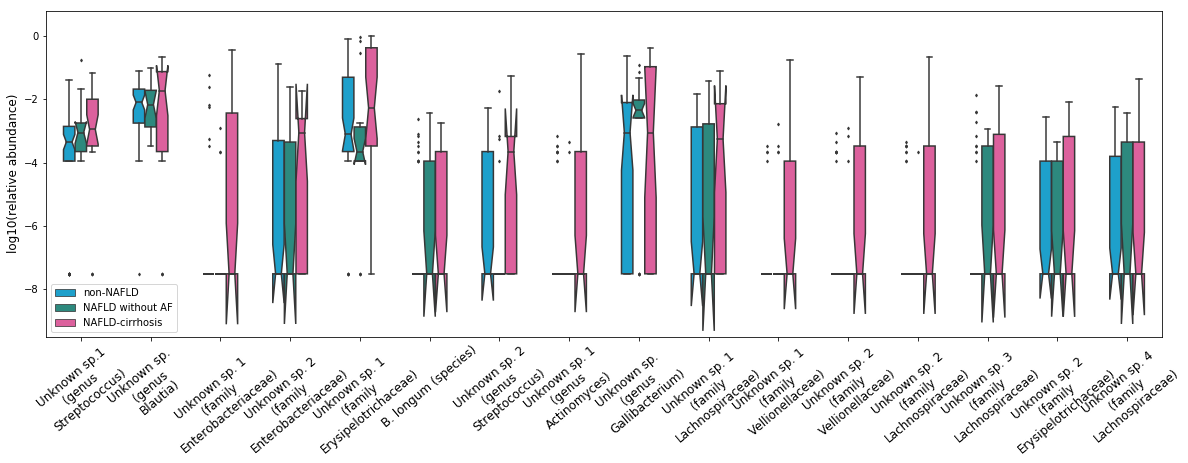

In [93]:
fig, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='feature', y='log10(abundance)',hue='groups', hue_order=['G1P', 'G2P', 'G3P'], 
            palette={'G1P':'#01AEE8','G2P':'#1E988A','G3P':'#F04D9C'}, 
            data=toplot2, ax=ax, width=0.5, notch=True, fliersize=2)
plt.ylim(-9.5, 0.8)
ax.set_ylabel('log10(relative abundance)', fontsize=12)
ax.set_xlabel('')
ax.set_xticklabels(rotation=40, labels=['Unknown sp.1\n(genus\nStreptococcus)',
                                       'Unknown sp. \n(genus\nBlautia)',
                                       'Unknown sp. 1\n(family\nEnterobacteriaceae)',
                                       'Unknown sp. 2\n(family\nEnterobacteriaceae)',
                                       'Unknown sp. 1\n(family\nErysipelotrichaceae)',
                                       'B. longum (species)',
                                       'Unknown sp. 2\n(genus\nStreptococcus)',
                                       'Unknown sp. 1\n(genus\nActinomyces)',
                                       'Unknown sp. \n(genus\nGallibacterium)',
                                       'Unknown sp. 1\n(family\nLachnospiraceae)',
                                       'Unknown sp. 1\n(family\nVellionellaceae)',
                                       'Unknown sp. 2\n(family\nVellionellaceae)',
                                       'Unknown sp. 2\n(family\nLachnospiraceae)',
                                       'Unknown sp. 3\n(family\nLachnospiraceae)',
                                       'Unknown sp. 2\n(family\nErysipelotrichaceae)',
                                       'Unknown sp. 4\n(family\nLachnospiraceae)'], fontsize=12)

handles, _ = fig.get_legend_handles_labels()
fig.legend(handles, ["non-NAFLD", "NAFLD without AF", "NAFLD-cirrhosis"],loc='lower left')

In [94]:
# save source data
toplot2.reset_index().rename(columns={'index':'#SampleID'}).to_csv('tables/source_data_fig3a.csv', index=False)

In [122]:
fig = fig.get_figure()
fig.tight_layout()
fig.savefig('figures/imp_features_G1PvG2PvG3P_G3P_R1.pdf', bbox_to_inches='tight')

## plot imp features by diabetes status

In [463]:
# filter to keep G1P and G2P only
expf = exp.filter_by_metadata('diabetes_t2', ['0', '1'], axis=0, negate=False)

# differential abundance test between diabetes = 0 and 1
res1 = diff_ab(expf, 'diabetes_t2', '0', '1')
# save means, p-values, effect size etc. for each microbial feature in the study
res1.to_csv('tables/diff_16S_all_T2D_0_1.csv', sep=',', index=False)

# save intersection with important features for G1P vs. G3P classification
diff = diff_imp_intersect(res1, seqs)
diff.to_csv('tables/diff_imp_16S_all_T2D_0_1.csv', sep=',', index=False)

/Users/priya/miniconda3/envs/calour/lib/python3.5/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [450]:
# to plot important features for G1P vs. G3P classification
expf = exp.filter_by_metadata('diabetes_t2', ['0', '1'], axis=0, negate=False)
# differential abundance test between NAFLD controls and NAFLD-cirrhosis
res5 = diff_ab(expf, 'diabetes_t2', '0', '1')
toplot3, toplot4 = plot_diff(res5, seqs, expf)

/Users/priya/miniconda3/envs/calour/lib/python3.5/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/priya/miniconda3/envs/calour/lib/python3.5/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/priya/miniconda3/envs/calour/lib/python3.5/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

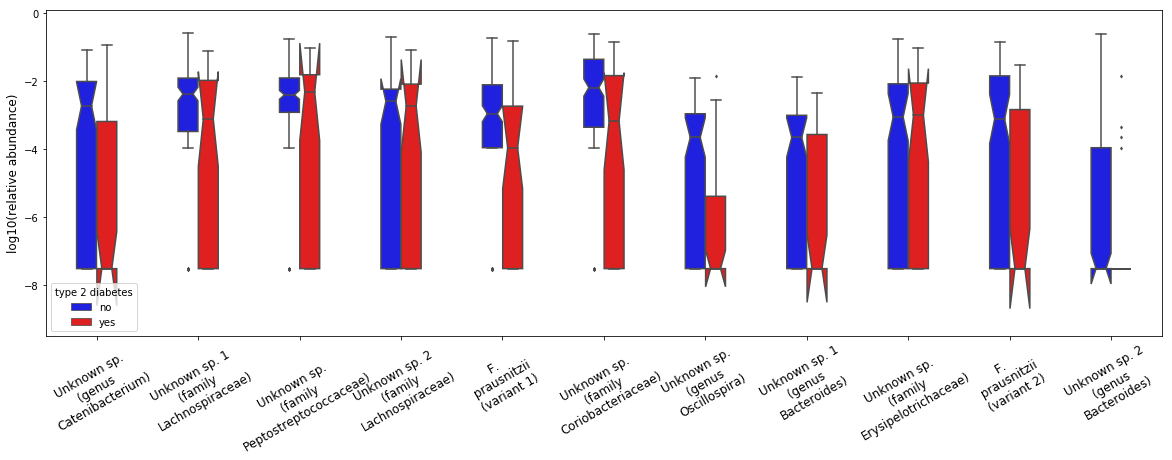

In [458]:
fig, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='feature', y='log10(abundance)', hue='diabetes_t2',
            palette={'0': '#0000ff', '1': '#ff0000'}, 
            data=toplot3, ax=ax, width=0.4, notch=True, fliersize=2)
plt.ylim(-9.5, 0.1)
ax.set_ylabel('log10(relative abundance)', fontsize=12)
ax.set_xlabel('')
ax.set_xticklabels(rotation=30, labels=['Unknown sp.\n(genus\nCatenibacterium)',
                                       'Unknown sp. 1\n(family\nLachnospiraceae)',
                                       'Unknown sp.\n(family\nPeptostreptococcaceae)',
                                       'Unknown sp. 2\n(family\nLachnospiraceae)',
                                       'F. \n prausnitzii \n(variant 1)',
                                       'Unknown sp. \n(family\nCoriobacteriaceae)',
                                       'Unknown sp. \n(genus\nOscillospira)',
                                       'Unknown sp. 1\n(genus\nBacteroides)',
                                       'Unknown sp. \n(family\nErysipelotrichaceae)',
                                       'F. \n prausnitzii \n(variant 2)',
                                       'Unknown sp. 2\n(genus\nBacteroides)'], fontsize=12)

handles, _ = fig.get_legend_handles_labels()
fig.legend(handles, ["no", "yes"],title='type 2 diabetes', loc='lower left')

In [459]:
fig = fig.get_figure()
fig.tight_layout()
fig.savefig('figures/imp_features_all_T2D_0_R1.pdf', bbox_to_inches='tight')

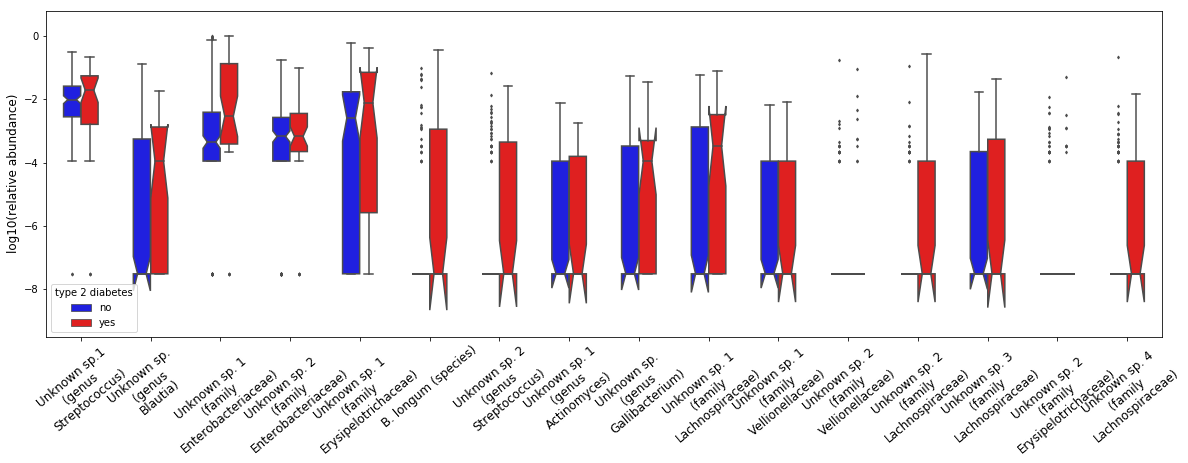

In [461]:
fig, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='feature', y='log10(abundance)',hue='diabetes_t2', 
                  palette={'0': '#0000ff', '1': '#ff0000'},
            data=toplot4, ax=ax, width=0.5, notch=True, fliersize=2)
plt.ylim(-9.5, 0.8)
ax.set_ylabel('log10(relative abundance)', fontsize=12)
ax.set_xlabel('')
ax.set_xticklabels(rotation=40, labels=['Unknown sp.1\n(genus\nStreptococcus)',
                                       'Unknown sp. \n(genus\nBlautia)',
                                       'Unknown sp. 1\n(family\nEnterobacteriaceae)',
                                       'Unknown sp. 2\n(family\nEnterobacteriaceae)',
                                       'Unknown sp. 1\n(family\nErysipelotrichaceae)',
                                       'B. longum (species)',
                                       'Unknown sp. 2\n(genus\nStreptococcus)',
                                       'Unknown sp. 1\n(genus\nActinomyces)',
                                       'Unknown sp. \n(genus\nGallibacterium)',
                                       'Unknown sp. 1\n(family\nLachnospiraceae)',
                                       'Unknown sp. 1\n(family\nVellionellaceae)',
                                       'Unknown sp. 2\n(family\nVellionellaceae)',
                                       'Unknown sp. 2\n(family\nLachnospiraceae)',
                                       'Unknown sp. 3\n(family\nLachnospiraceae)',
                                       'Unknown sp. 2\n(family\nErysipelotrichaceae)',
                                       'Unknown sp. 4\n(family\nLachnospiraceae)'], fontsize=12)

handles, _ = fig.get_legend_handles_labels()
fig.legend(handles, ["no", "yes"], title='type 2 diabetes', loc='lower left')

In [462]:
fig = fig.get_figure()
fig.tight_layout()
fig.savefig('figures/imp_features_all_T2D_1_R1.pdf', bbox_to_inches='tight')